In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as stats
import math
from sklearn.feature_selection import SelectKBest, chi2, f_classif, VarianceThreshold

In [276]:
df_spotify_original = pd.read_csv('datasets/spotify-2023.csv', index_col=0, encoding='ISO-8859-1')

In [277]:
df_spotify_original.head()

,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
track_name,,,,,,,,,,,,,,,,,,,,,
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,...,125,B,Major,80,89,83,31,0,8,4
LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,...,92,C#,Major,71,61,74,7,0,10,4
vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,...,138,F,Major,51,32,53,17,0,31,6
Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,...,170,A,Major,55,58,72,11,0,11,15
WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,...,144,A,Minor,65,23,80,14,63,11,6


In [278]:
df_spotify_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 953 entries, Seven (feat. Latto) (Explicit Ver.) to Alone
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   artist(s)_name        953 non-null    object
 1   artist_count          953 non-null    int64 
 2   released_year         953 non-null    int64 
 3   released_month        953 non-null    int64 
 4   released_day          953 non-null    int64 
 5   in_spotify_playlists  953 non-null    int64 
 6   in_spotify_charts     953 non-null    int64 
 7   streams               953 non-null    object
 8   in_apple_playlists    953 non-null    int64 
 9   in_apple_charts       953 non-null    int64 
 10  in_deezer_playlists   953 non-null    object
 11  in_deezer_charts      953 non-null    int64 
 12  in_shazam_charts      903 non-null    object
 13  bpm                   953 non-null    int64 
 14  key                   858 non-null    object
 15  mode     

In [279]:
df_spotify_original.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [280]:
df_spotify_original.isnull().mean() * 100

artist(s)_name          0.00000
artist_count            0.00000
released_year           0.00000
released_month          0.00000
released_day            0.00000
in_spotify_playlists    0.00000
in_spotify_charts       0.00000
streams                 0.00000
in_apple_playlists      0.00000
in_apple_charts         0.00000
in_deezer_playlists     0.00000
in_deezer_charts        0.00000
in_shazam_charts        5.24659
bpm                     0.00000
key                     9.96852
mode                    0.00000
danceability_%          0.00000
valence_%               0.00000
energy_%                0.00000
acousticness_%          0.00000
instrumentalness_%      0.00000
liveness_%              0.00000
speechiness_%           0.00000
dtype: float64

In [281]:
df_spotify = df_spotify_original.copy()

In [282]:
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 953 entries, Seven (feat. Latto) (Explicit Ver.) to Alone
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   artist(s)_name        953 non-null    object
 1   artist_count          953 non-null    int64 
 2   released_year         953 non-null    int64 
 3   released_month        953 non-null    int64 
 4   released_day          953 non-null    int64 
 5   in_spotify_playlists  953 non-null    int64 
 6   in_spotify_charts     953 non-null    int64 
 7   streams               953 non-null    object
 8   in_apple_playlists    953 non-null    int64 
 9   in_apple_charts       953 non-null    int64 
 10  in_deezer_playlists   953 non-null    object
 11  in_deezer_charts      953 non-null    int64 
 12  in_shazam_charts      903 non-null    object
 13  bpm                   953 non-null    int64 
 14  key                   858 non-null    object
 15  mode     

In [283]:
def impute_keys_with_null_values(df):
    mode = df['key'].mode()[0]
    df['key'].fillna(mode, inplace=True)
    return df
impute_keys_with_null_values(df_spotify)

,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
track_name,,,,,,,,,,,,,,,,,,,,,
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,...,125,B,Major,80,89,83,31,0,8,4
LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,...,92,C#,Major,71,61,74,7,0,10,4
vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,...,138,F,Major,51,32,53,17,0,31,6
Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,...,170,A,Major,55,58,72,11,0,11,15
WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,13,...,144,A,Major,60,24,39,57,0,8,3
Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,0,...,166,F#,Major,42,7,24,83,1,12,6
A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,0,...,92,C#,Major,80,81,67,4,0,8,6


In [284]:
def remove_commas(df, column_name):
    df[column_name] = df[column_name].str.replace(',', '')
    return df
df_spotify = remove_commas(df_spotify, 'in_deezer_playlists')

In [285]:
def convert_int64_to_float64(df):
    df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')
    df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')
    df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
    for col in df.columns:
        if df[col].dtype == 'int64' and col != 'released_year' and col != 'released_month' and col != 'released_day':
            df[col] = df[col].astype('float64')
    return df
convert_int64_to_float64(df_spotify)


,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
track_name,,,,,,,,,,,,,,,,,,,,,
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2.0,2023,7,14,553.0,147.0,141381703.0,43.0,263.0,...,125.0,B,Major,80.0,89.0,83.0,31.0,0.0,8.0,4.0
LALA,Myke Towers,1.0,2023,3,23,1474.0,48.0,133716286.0,48.0,126.0,...,92.0,C#,Major,71.0,61.0,74.0,7.0,0.0,10.0,4.0
vampire,Olivia Rodrigo,1.0,2023,6,30,1397.0,113.0,140003974.0,94.0,207.0,...,138.0,F,Major,51.0,32.0,53.0,17.0,0.0,31.0,6.0
Cruel Summer,Taylor Swift,1.0,2019,8,23,7858.0,100.0,800840817.0,116.0,207.0,...,170.0,A,Major,55.0,58.0,72.0,11.0,0.0,11.0,15.0
WHERE SHE GOES,Bad Bunny,1.0,2023,5,18,3133.0,50.0,303236322.0,84.0,133.0,...,144.0,A,Minor,65.0,23.0,80.0,14.0,63.0,11.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
My Mind & Me,Selena Gomez,1.0,2022,11,3,953.0,0.0,91473363.0,61.0,13.0,...,144.0,A,Major,60.0,24.0,39.0,57.0,0.0,8.0,3.0
Bigger Than The Whole Sky,Taylor Swift,1.0,2022,10,21,1180.0,0.0,121871870.0,4.0,0.0,...,166.0,F#,Major,42.0,7.0,24.0,83.0,1.0,12.0,6.0
A Veces (feat. Feid),"Feid, Paulo Londra",2.0,2022,11,3,573.0,0.0,73513683.0,2.0,0.0,...,92.0,C#,Major,80.0,81.0,67.0,4.0,0.0,8.0,6.0


In [287]:
def impute_missing_values(df):
    mean = df['in_shazam_charts'].mean().round()
    df['in_shazam_charts'] = df['in_shazam_charts'].fillna(mean)
    return df
df_spotify = impute_missing_values(df_spotify)


In [288]:
def remove_stream_with_null_values(df):
    df.dropna(subset=['streams'], inplace=True)
    return df
remove_stream_with_null_values(df_spotify)

,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date
track_name,,,,,,,,,,,,,,,,,,,,,
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2.0,553.0,147.0,141381703.0,43.0,263.0,45.0,10.0,826.0,...,B,Major,80.0,89.0,83.0,31.0,0.0,8.0,4.0,2023-07-14
LALA,Myke Towers,1.0,1474.0,48.0,133716286.0,48.0,126.0,58.0,14.0,382.0,...,C#,Major,71.0,61.0,74.0,7.0,0.0,10.0,4.0,2023-03-23
vampire,Olivia Rodrigo,1.0,1397.0,113.0,140003974.0,94.0,207.0,91.0,14.0,949.0,...,F,Major,51.0,32.0,53.0,17.0,0.0,31.0,6.0,2023-06-30
Cruel Summer,Taylor Swift,1.0,7858.0,100.0,800840817.0,116.0,207.0,125.0,12.0,548.0,...,A,Major,55.0,58.0,72.0,11.0,0.0,11.0,15.0,2019-08-23
WHERE SHE GOES,Bad Bunny,1.0,3133.0,50.0,303236322.0,84.0,133.0,87.0,15.0,425.0,...,A,Minor,65.0,23.0,80.0,14.0,63.0,11.0,6.0,2023-05-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
My Mind & Me,Selena Gomez,1.0,953.0,0.0,91473363.0,61.0,13.0,37.0,1.0,0.0,...,A,Major,60.0,24.0,39.0,57.0,0.0,8.0,3.0,2022-11-03
Bigger Than The Whole Sky,Taylor Swift,1.0,1180.0,0.0,121871870.0,4.0,0.0,8.0,0.0,0.0,...,F#,Major,42.0,7.0,24.0,83.0,1.0,12.0,6.0,2022-10-21
A Veces (feat. Feid),"Feid, Paulo Londra",2.0,573.0,0.0,73513683.0,2.0,0.0,7.0,0.0,0.0,...,C#,Major,80.0,81.0,67.0,4.0,0.0,8.0,6.0,2022-11-03


In [289]:
df_spotify.isnull().mean() * 100

artist(s)_name          0.0
artist_count            0.0
in_spotify_playlists    0.0
in_spotify_charts       0.0
streams                 0.0
in_apple_playlists      0.0
in_apple_charts         0.0
in_deezer_playlists     0.0
in_deezer_charts        0.0
in_shazam_charts        0.0
bpm                     0.0
key                     0.0
mode                    0.0
danceability_%          0.0
valence_%               0.0
energy_%                0.0
acousticness_%          0.0
instrumentalness_%      0.0
liveness_%              0.0
speechiness_%           0.0
released_date           0.0
dtype: float64

In [290]:
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, Seven (feat. Latto) (Explicit Ver.) to Alone
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   artist(s)_name        952 non-null    object        
 1   artist_count          952 non-null    float64       
 2   in_spotify_playlists  952 non-null    float64       
 3   in_spotify_charts     952 non-null    float64       
 4   streams               952 non-null    float64       
 5   in_apple_playlists    952 non-null    float64       
 6   in_apple_charts       952 non-null    float64       
 7   in_deezer_playlists   952 non-null    float64       
 8   in_deezer_charts      952 non-null    float64       
 9   in_shazam_charts      952 non-null    float64       
 10  bpm                   952 non-null    float64       
 11  key                   952 non-null    object        
 12  mode                  952 non-null    object   

In [291]:
x = df_spotify.copy()

In [292]:
percentage_features = ['danceability_%', 'energy_%', 'speechiness_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'valence_%']
date_features = ['released_year', 'released_month', 'released_day']
def scale_features(df, percentage_features):
    for col in percentage_features:
        df[col] = df[col] / 100.0
    return df
scale_features(df_spotify, percentage_features)

,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date
track_name,,,,,,,,,,,,,,,,,,,,,
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2.0,553.0,147.0,141381703.0,43.0,263.0,45.0,10.0,826.0,...,B,Major,0.80,0.89,0.83,0.31,0.00,0.08,0.04,2023-07-14
LALA,Myke Towers,1.0,1474.0,48.0,133716286.0,48.0,126.0,58.0,14.0,382.0,...,C#,Major,0.71,0.61,0.74,0.07,0.00,0.10,0.04,2023-03-23
vampire,Olivia Rodrigo,1.0,1397.0,113.0,140003974.0,94.0,207.0,91.0,14.0,949.0,...,F,Major,0.51,0.32,0.53,0.17,0.00,0.31,0.06,2023-06-30
Cruel Summer,Taylor Swift,1.0,7858.0,100.0,800840817.0,116.0,207.0,125.0,12.0,548.0,...,A,Major,0.55,0.58,0.72,0.11,0.00,0.11,0.15,2019-08-23
WHERE SHE GOES,Bad Bunny,1.0,3133.0,50.0,303236322.0,84.0,133.0,87.0,15.0,425.0,...,A,Minor,0.65,0.23,0.80,0.14,0.63,0.11,0.06,2023-05-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
My Mind & Me,Selena Gomez,1.0,953.0,0.0,91473363.0,61.0,13.0,37.0,1.0,0.0,...,A,Major,0.60,0.24,0.39,0.57,0.00,0.08,0.03,2022-11-03
Bigger Than The Whole Sky,Taylor Swift,1.0,1180.0,0.0,121871870.0,4.0,0.0,8.0,0.0,0.0,...,F#,Major,0.42,0.07,0.24,0.83,0.01,0.12,0.06,2022-10-21
A Veces (feat. Feid),"Feid, Paulo Londra",2.0,573.0,0.0,73513683.0,2.0,0.0,7.0,0.0,0.0,...,C#,Major,0.80,0.81,0.67,0.04,0.00,0.08,0.06,2022-11-03


In [293]:
def standardize(data: pd.Series) -> pd.Series:
    return (data - np.mean(data)) / np.std(data)

In [294]:
def normalize(data: pd.Series) -> pd.Series:
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [295]:
def standardize_columns(df: pd.DataFrame) -> pd.DataFrame:
    for col in df.columns:
        if df[col].dtype == 'float64' and col != 'artist_count' and col not in percentage_features and col not in date_features:
            df[col + ' Z'] = standardize(df[col])
    return df
standardize_columns(df_spotify)

,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,...,released_date,in_spotify_playlists Z,in_spotify_charts Z,streams Z,in_apple_playlists Z,in_apple_charts Z,in_deezer_playlists Z,in_deezer_charts Z,in_shazam_charts Z,bpm Z
track_name,,,,,,,,,,,,,,,,,,,,,
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2.0,553.0,147.0,141381703.0,43.0,263.0,45.0,10.0,826.0,...,2023-07-14,-0.588758,6.896440,-0.657929,-0.287724,4.170501,-0.301230,1.214732,6.317955,0.087202
LALA,Myke Towers,1.0,1474.0,48.0,133716286.0,48.0,126.0,58.0,14.0,382.0,...,2023-03-23,-0.472135,1.838224,-0.671459,-0.229871,1.463112,-0.289730,1.877534,2.697352,-1.089065
vampire,Olivia Rodrigo,1.0,1397.0,113.0,140003974.0,94.0,207.0,91.0,14.0,949.0,...,2023-06-30,-0.481885,5.159275,-0.660361,0.302382,3.063831,-0.260539,1.877534,7.320959,0.550580
Cruel Summer,Taylor Swift,1.0,7858.0,100.0,800840817.0,116.0,207.0,125.0,12.0,548.0,...,2019-08-23,0.336248,4.495065,0.506043,0.556937,3.063831,-0.230464,1.546133,4.051001,1.691202
WHERE SHE GOES,Bad Bunny,1.0,3133.0,50.0,303236322.0,84.0,133.0,87.0,15.0,425.0,...,2023-05-18,-0.262062,1.940410,-0.372249,0.186675,1.601446,-0.264078,2.043235,3.047996,0.764446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
My Mind & Me,Selena Gomez,1.0,953.0,0.0,91473363.0,61.0,13.0,37.0,1.0,0.0,...,2022-11-03,-0.538107,-0.614244,-0.746019,-0.079451,-0.769990,-0.308306,-0.276574,-0.417670,0.764446
Bigger Than The Whole Sky,Taylor Swift,1.0,1180.0,0.0,121871870.0,4.0,0.0,8.0,0.0,0.0,...,2022-10-21,-0.509363,-0.614244,-0.692365,-0.738981,-1.026896,-0.333959,-0.442275,-0.417670,1.548624
A Veces (feat. Feid),"Feid, Paulo Londra",2.0,573.0,0.0,73513683.0,2.0,0.0,7.0,0.0,0.0,...,2022-11-03,-0.586225,-0.614244,-0.777719,-0.762123,-1.026896,-0.334844,-0.442275,-0.417670,-1.089065


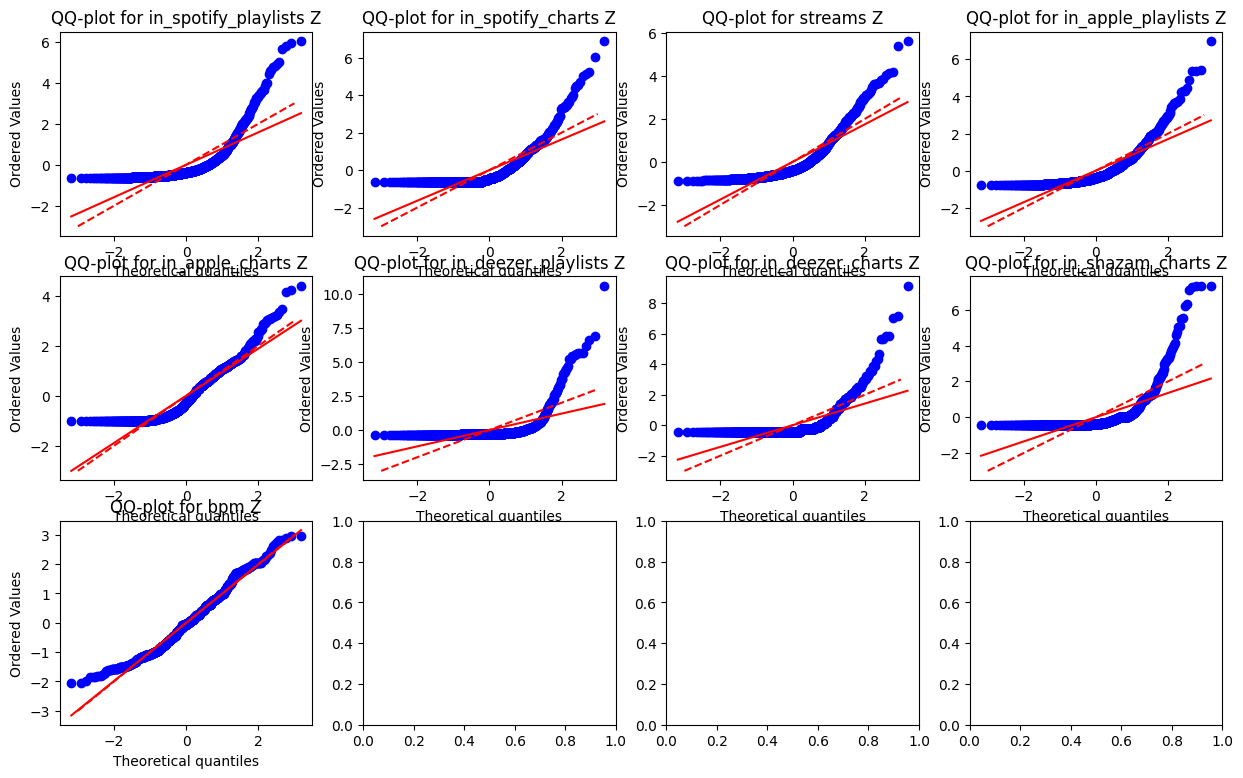

In [296]:
def qq_plot(df: pd.DataFrame):
    col_names = df.columns[21:]
    num_plots = len(col_names)
    
    # Calculate the number of rows and columns for the grid
    num_rows = math.ceil(num_plots / 4)
    grid_cols = min(num_plots, 4)
    
    fig, axs = plt.subplots(num_rows, grid_cols, figsize=(15, num_rows*3))
    axs = axs.ravel()  # Flatten the array of axes to make it easier to iterate over
    
    for i, col in enumerate(col_names):
        stats.probplot(df[col], plot=axs[i])
        axs[i].set_title('QQ-plot for ' + col)
        axs[i].plot([-3, 3], [-3, 3], color='r', linestyle='--')

qq_plot(df_spotify)

In [297]:
cols = ['bpm']
def normalize_cols(df: pd.DataFrame, cols: list):
    col_names = df.columns[:21]
    for col in col_names:
        if (col not in cols) and col != 'artist_count' and col not in percentage_features and df[col].dtype == 'float64' and col not in date_features:
            df[col] = normalize(df[col])
    return df
normalize_cols(df_spotify, cols)

,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,...,released_date,in_spotify_playlists Z,in_spotify_charts Z,streams Z,in_apple_playlists Z,in_apple_charts Z,in_deezer_playlists Z,in_deezer_charts Z,in_shazam_charts Z,bpm Z
track_name,,,,,,,,,,,,,,,,,,,,,
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2.0,0.009874,1.000000,0.038170,0.063988,0.956364,0.003639,0.172414,0.866737,...,2023-07-14,-0.588758,6.896440,-0.657929,-0.287724,4.170501,-0.301230,1.214732,6.317955,0.087202
LALA,Myke Towers,1.0,0.027295,0.326531,0.036101,0.071429,0.458182,0.004690,0.241379,0.400839,...,2023-03-23,-0.472135,1.838224,-0.671459,-0.229871,1.463112,-0.289730,1.877534,2.697352,-1.089065
vampire,Olivia Rodrigo,1.0,0.025838,0.768707,0.037798,0.139881,0.752727,0.007358,0.241379,0.995803,...,2023-06-30,-0.481885,5.159275,-0.660361,0.302382,3.063831,-0.260539,1.877534,7.320959,0.550580
Cruel Summer,Taylor Swift,1.0,0.148051,0.680272,0.216215,0.172619,0.752727,0.010108,0.206897,0.575026,...,2019-08-23,0.336248,4.495065,0.506043,0.556937,3.063831,-0.230464,1.546133,4.051001,1.691202
WHERE SHE GOES,Bad Bunny,1.0,0.058676,0.340136,0.081869,0.125000,0.483636,0.007035,0.258621,0.445960,...,2023-05-18,-0.262062,1.940410,-0.372249,0.186675,1.601446,-0.264078,2.043235,3.047996,0.764446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
My Mind & Me,Selena Gomez,1.0,0.017440,0.000000,0.024696,0.090774,0.047273,0.002992,0.017241,0.000000,...,2022-11-03,-0.538107,-0.614244,-0.746019,-0.079451,-0.769990,-0.308306,-0.276574,-0.417670,0.764446
Bigger Than The Whole Sky,Taylor Swift,1.0,0.021734,0.000000,0.032903,0.005952,0.000000,0.000647,0.000000,0.000000,...,2022-10-21,-0.509363,-0.614244,-0.692365,-0.738981,-1.026896,-0.333959,-0.442275,-0.417670,1.548624
A Veces (feat. Feid),"Feid, Paulo Londra",2.0,0.010252,0.000000,0.019847,0.002976,0.000000,0.000566,0.000000,0.000000,...,2022-11-03,-0.586225,-0.614244,-0.777719,-0.762123,-1.026896,-0.334844,-0.442275,-0.417670,-1.089065


In [298]:
def standardize_cols(df: pd.DataFrame, cols: list):
    col_names = df.columns[:21]
    col_names_z = df.columns[21:]
    for col in col_names:
        if (col in cols) and col != 'artist_count' and col not in percentage_features and df[col].dtype == 'float64' and col not in date_features:
            df[col] = standardize(df[col])
    for col in col_names_z:
        df.drop(col, axis=1, inplace=True)   
    return df
standardize_cols(df_spotify, cols)


,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date
track_name,,,,,,,,,,,,,,,,,,,,,
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2.0,0.009874,1.000000,0.038170,0.063988,0.956364,0.003639,0.172414,0.866737,...,B,Major,0.80,0.89,0.83,0.31,0.00,0.08,0.04,2023-07-14
LALA,Myke Towers,1.0,0.027295,0.326531,0.036101,0.071429,0.458182,0.004690,0.241379,0.400839,...,C#,Major,0.71,0.61,0.74,0.07,0.00,0.10,0.04,2023-03-23
vampire,Olivia Rodrigo,1.0,0.025838,0.768707,0.037798,0.139881,0.752727,0.007358,0.241379,0.995803,...,F,Major,0.51,0.32,0.53,0.17,0.00,0.31,0.06,2023-06-30
Cruel Summer,Taylor Swift,1.0,0.148051,0.680272,0.216215,0.172619,0.752727,0.010108,0.206897,0.575026,...,A,Major,0.55,0.58,0.72,0.11,0.00,0.11,0.15,2019-08-23
WHERE SHE GOES,Bad Bunny,1.0,0.058676,0.340136,0.081869,0.125000,0.483636,0.007035,0.258621,0.445960,...,A,Minor,0.65,0.23,0.80,0.14,0.63,0.11,0.06,2023-05-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
My Mind & Me,Selena Gomez,1.0,0.017440,0.000000,0.024696,0.090774,0.047273,0.002992,0.017241,0.000000,...,A,Major,0.60,0.24,0.39,0.57,0.00,0.08,0.03,2022-11-03
Bigger Than The Whole Sky,Taylor Swift,1.0,0.021734,0.000000,0.032903,0.005952,0.000000,0.000647,0.000000,0.000000,...,F#,Major,0.42,0.07,0.24,0.83,0.01,0.12,0.06,2022-10-21
A Veces (feat. Feid),"Feid, Paulo Londra",2.0,0.010252,0.000000,0.019847,0.002976,0.000000,0.000566,0.000000,0.000000,...,C#,Major,0.80,0.81,0.67,0.04,0.00,0.08,0.06,2022-11-03


In [299]:
def get_highly_correlated_features(df, target_variable, threshold):
    # Select numeric columns
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
    
    # Calculate correlation matrix
    correlation_matrix = df[numeric_cols].corr()
    
    # Get highly correlated features with the target variable
    target_correlation = correlation_matrix[target_variable]
    highly_correlated_features = target_correlation[abs(target_correlation) >= threshold].index.tolist()
    
    # Get non-numeric variables
    non_numeric_cols = df.select_dtypes(exclude=np.number).columns.tolist()
    
    # Combine highly correlated features and non-numeric variables
    selected_features = highly_correlated_features + non_numeric_cols
    
    # Create a new dataframe with selected features
    selected_df = df[selected_features]
    
    return selected_df
df_spotify = get_highly_correlated_features(df_spotify, 'streams', 0.5)
df_spotify


,in_spotify_playlists,streams,in_apple_playlists,in_deezer_playlists,artist(s)_name,key,mode,released_date
track_name,,,,,,,,
Seven (feat. Latto) (Explicit Ver.),0.009874,0.038170,0.063988,0.003639,"Latto, Jung Kook",B,Major,2023-07-14
LALA,0.027295,0.036101,0.071429,0.004690,Myke Towers,C#,Major,2023-03-23
vampire,0.025838,0.037798,0.139881,0.007358,Olivia Rodrigo,F,Major,2023-06-30
Cruel Summer,0.148051,0.216215,0.172619,0.010108,Taylor Swift,A,Major,2019-08-23
WHERE SHE GOES,0.058676,0.081869,0.125000,0.007035,Bad Bunny,A,Minor,2023-05-18
...,...,...,...,...,...,...,...,...
My Mind & Me,0.017440,0.024696,0.090774,0.002992,Selena Gomez,A,Major,2022-11-03
Bigger Than The Whole Sky,0.021734,0.032903,0.005952,0.000647,Taylor Swift,F#,Major,2022-10-21
A Veces (feat. Feid),0.010252,0.019847,0.002976,0.000566,"Feid, Paulo Londra",C#,Major,2022-11-03


In [ ]:
def create_release_date(df):
    df['released_date'] = pd.to_datetime(df['released_year'].astype(str) + '-' + df['released_month'].astype(str) + '-' + df['released_day'].astype(str))
    df.drop(['released_year', 'released_month', 'released_day'], axis=1, inplace=True)
    return df
create_release_date(df_spotify)

In [74]:
correlation_matrix = df_spotify.corr(numeric_only=True)
target_correlation = correlation_matrix['streams']
target_correlation

artist_count           -0.136436
released_year          -0.228506
released_month         -0.024912
released_day            0.010587
in_spotify_playlists    0.789786
in_spotify_charts       0.245773
streams                 1.000000
in_apple_playlists      0.771917
in_apple_charts         0.320057
in_deezer_playlists     0.598104
in_deezer_charts        0.228575
in_shazam_charts        0.050474
bpm                    -0.002438
danceability_%         -0.105406
valence_%              -0.040810
energy_%               -0.026050
acousticness_%         -0.004483
instrumentalness_%     -0.044902
liveness_%             -0.048337
speechiness_%          -0.112302
Name: streams, dtype: float64

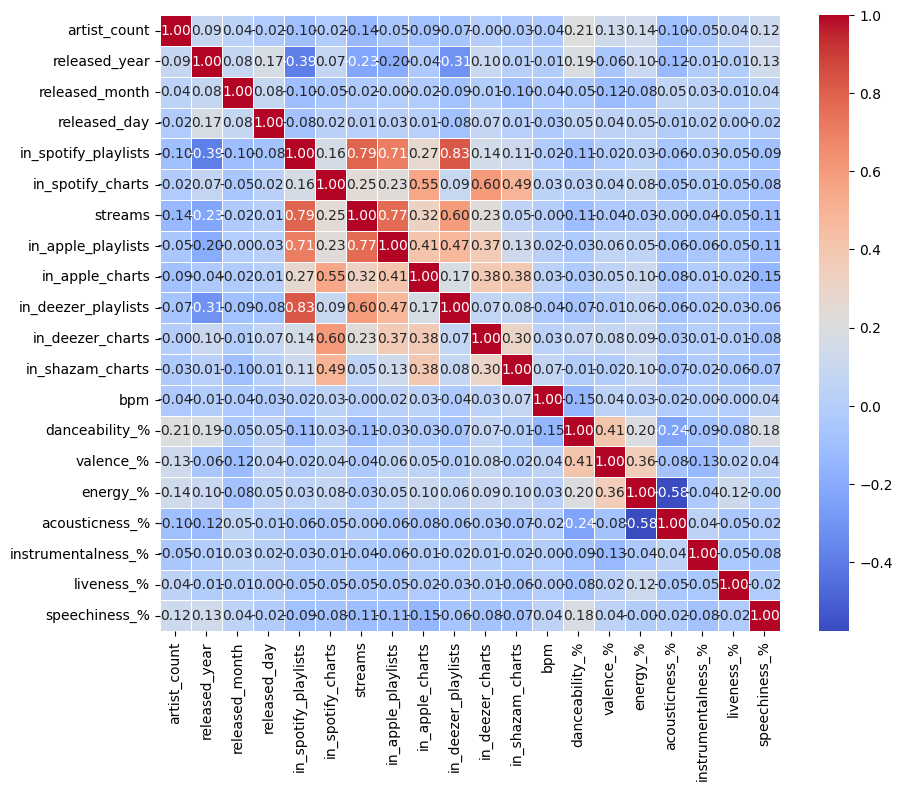

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

In [76]:
# Keep features with absolute correlation above a threshold
threshold = 0.3
relevant_features = target_correlation[abs(target_correlation) > threshold].index
relevant_features

Index(['in_spotify_playlists', 'streams', 'in_apple_playlists',
       'in_apple_charts', 'in_deezer_playlists'],
      dtype='object')

In [78]:
from sklearn import feature_selection

threshold = 0.3

numeric_cols = x.select_dtypes(include=np.number).columns.tolist()
selector = feature_selection.VarianceThreshold(threshold)
variance_filtered = selector.fit_transform(x[numeric_cols])

x = pd.DataFrame(variance_filtered, columns=x.columns[selector.get_support()])

IndexError: boolean index did not match indexed array along dimension 0; dimension is 23 but corresponding boolean dimension is 20

In [ ]:
pca = PCA(n_components=2)

# fit and transform the data using pca
iris_pca = pca.fit_transform(df_spotify)

df = pd.DataFrame(iris_pca, columns=['PC1', 'PC2'])

# add the labels back to the iris dataframe
iris['species'] = labels

In [ ]:
from scipy.stats import ttest_ind

significant_features = []
for feature in df_spotify.columns:
    _, p_value = ttest_ind(df_spotify[df_spotify['streams'] == 0][feature], df_spotify[df_spotify['streams'] == 1][feature])
    if p_value < 0.05:  # Adjust significance level as needed
        significant_features.append(feature)


# Apply PCA for dimensionality reduction
# pca = PCA(n_components=5)
# reduced_features = pca.fit_transform(selected_features)

# # Add the class label and playback duration to the reduced feature set
# reduced_features_df = pd.DataFrame(reduced_features, columns=['pca_comp1', 'pca_comp2', 'pca_comp3', 'pca_comp4', 'pca_comp5'])
# final_data = reduced_features_df.join(data[['class', 'playback_duration', 'num_plays']])

TypeError: unsupported operand type(s) for /: 'str' and 'int'